In [51]:
import pandas as pd
import math
from math import radians, cos, sin, asin, sqrt
from matplotlib import pyplot as plt
import seaborn as sns

In [22]:
world_coastline = pd.read_csv("C:/Users/payoj.jain/Documents/projects/long_lat_coastal.csv")

In [23]:
world_coastline.head()

,Longitude,Latitude
0,-4.942370,55.725449
1,-4.941922,55.725585
2,-4.942002,55.725212
3,-4.942200,55.725100
4,-4.942320,55.725179


In [27]:
world_coastline['Latitude'].min()

-34.1387152

In [5]:
accommodations = pd.read_csv("C:/Users/payoj.jain/Documents/projects/mg_base_with_elevation.csv")
accommodations[accommodations['ACCOMMODATION_CODE'].str.contains('IT') == True].head()

,ACCOMMODATION_CODE,X,ACCOMMODATION_TYPE,ACCO_DESCRIPTION,PROVIDER_NAME,NUMBER_OF_PERSONS,BEDROOM_COUNT,BATHROOM_COUNT,HAS_WIFI,HAS_POOL,...,X2019.y,total2019,total2018,total2017,Total_HO,Total_BV,LATITUDE,LONGITUDE,max,ELEVATION
15903,IT-00000-23,85405,2,Farmhouse,Belvilla,10,6,2,1,1,...,0.000,0.000,0.00000,7550.540,0.00000,7550.54,43.828333,11.528611,7550.540,469.0
15904,IT-00000-47,85429,2,Farmhouse,Belvilla,8,4,2,1,1,...,12783.003,16814.113,16074.55944,1202.236,29006.37844,5084.53,43.828000,11.528000,16814.113,469.0
15905,IT-00000-93,85475,3,Villa,Belvilla,22,11,11,1,1,...,0.000,0.000,0.00000,6567.000,6567.00000,0.00,43.382501,11.551966,6567.000,314.0
15906,IT-00001-45,85527,2,Farmhouse,Belvilla,4,2,1,1,1,...,2246.632,5367.732,7513.87100,6501.255,4828.28800,14554.57,43.828333,11.528611,7513.871,469.0
15907,IT-00001-48,85530,2,Cottage,Belvilla,2,1,1,1,1,...,4372.582,10761.152,11264.90000,3635.309,9323.94100,16337.42,43.828333,11.528611,11264.900,469.0


In [6]:
def get_lat_long_range(gps_latitude, gps_longitude, distance):
    earth_rad = 6371
    min_lat = gps_latitude - (180 / math.pi) * (distance / earth_rad)
    max_lat = gps_latitude + (180 / math.pi) * (distance / earth_rad)

    min_long = gps_longitude - (180 / math.pi) * (
        math.asin(distance / earth_rad) / math.cos((math.pi / 180) * gps_latitude)
    )
    max_long = gps_longitude + (180 / math.pi) * (
        math.asin(distance / earth_rad) / math.cos((math.pi / 180) * gps_latitude)
    )

    return min_lat, max_lat, min_long, max_long

In [ ]:
def get_lat_long_range(accommodations, distance):
    earth_rad = 6371
    min_lat = accommodations["latitude"] - (180 / math.pi) * (distance / earth_rad)
    max_lat = accommodations["latitude"] + (180 / math.pi) * (distance / earth_rad)

    min_long = accommodation["longitude"] - (180 / math.pi) * (
        math.asin(distance / earth_rad) / math.cos((math.pi / 180) * accommodations["latitude"])
    )
    max_long = accommodations["longitude"] + (180 / math.pi) * (
        math.asin(distance / earth_rad) / math.cos((math.pi / 180) * accommodations["latitude"])
    )

    return min_lat, max_lat, min_long, max_long

In [1]:
import sqlite3

In [ ]:
def get_coastal_points_within_range(accommodations, europe_coastline):
    return pd.merge(accommodations, europe_coastline, )

In [32]:
# coordinates_range = ((62.967414937928446, 63.59694006207156, 7.78878253821998, 9.18898866178002))
def get_coastal_points_within_range(coordinates_range):
    x = world_coastline[(world_coastline['Longitude'].between(coordinates_range[2], coordinates_range[3])) & (world_coastline['Latitude'].between(coordinates_range[0], coordinates_range[1]))]
    return x

In [33]:
def get_nearest_coastal_point(property_coordinate, coastal_points):
    # The math module contains a function named 
    # radians which converts from degrees to radians. 
    shortest_distance = 100
    nearest_point = []
    
    for point in coastal_points.values:
        lon1 = radians(property_coordinate[0]) 
        lon2 = radians(point[0]) 
        lat1 = radians(property_coordinate[1]) 
        lat2 = radians(point[1]) 
       
        # Haversine formula  
        dlon = lon2 - lon1  
        dlat = lat2 - lat1 
        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2

        c = 2 * asin(sqrt(a))  

        # Radius of earth in kilometers. Use 3956 for miles 
        r = 6371

        # calculate the result 
        distance = c * r
        if distance < shortest_distance :
            shortest_distance = distance
            nearest_point = point
    return shortest_distance, nearest_point

In [34]:
def get_coastal_points():
    nearest_coastal_points = pd.DataFrame(columns=('ACCOMMODATION_CODE','if_near_coast','distance_from_coast', 'nearest_coastal_longitude', 'nearest_coastal_latitude'))
    i=0
    count=0
    
    accommodations["MIN_Lat"], accommodations["Max_lat"], accommodations["Min_long"], accommodations=["Max_long"] = get_lat_long_range(accommodations, 30)
    
    for accommodation in accommodations.values:
        if(i%1000 ==0):
            print(i," properties are checked. ", count, " properties are coastal")
        i+=1
        acco_code = accommodation[0]
        latitude = accommodation[-4]
        longitude = accommodation[-3]
        coordinates_range = get_lat_long_range(latitude, longitude, 30)
        points = get_coastal_points_within_range(coordinates_range)
        if not points.empty:
            count+=1
            shortest_distance, nearest_point = get_nearest_coastal_point([longitude, latitude], points)
            points_df = pd.DataFrame([{'ACCOMMODATION_CODE': acco_code, 'if_near_coast': 1, 'distance_from_coast': shortest_distance, 'nearest_coastal_longitude':nearest_point[0], 'nearest_coastal_latitude':nearest_point[1]}])
        else:
            points_df = pd.DataFrame([{'ACCOMMODATION_CODE': acco_code, 'if_near_coast': 0, 'distance_from_coast': 'NaN', 'nearest_coastal_longitude':'NaN', 'nearest_coastal_latitude':'NaN'}])

        nearest_coastal_points = pd.concat([nearest_coastal_points, points_df], axis=0)
    return nearest_coastal_points
#         coastal_points = pd.concat([coastal_points, points])
#     return coastal_points

In [35]:
coastal_points = get_coastal_points()

0  properties are checked.  0  properties are coastal
1000  properties are checked.  0  properties are coastal
2000  properties are checked.  0  properties are coastal
3000  properties are checked.  0  properties are coastal
4000  properties are checked.  0  properties are coastal
5000  properties are checked.  180  properties are coastal
6000  properties are checked.  775  properties are coastal
7000  properties are checked.  793  properties are coastal
8000  properties are checked.  795  properties are coastal
9000  properties are checked.  795  properties are coastal
10000  properties are checked.  796  properties are coastal
11000  properties are checked.  797  properties are coastal
12000  properties are checked.  832  properties are coastal
13000  properties are checked.  858  properties are coastal
14000  properties are checked.  929  properties are coastal
15000  properties are checked.  929  properties are coastal
16000  properties are checked.  929  properties are coastal
170

In [37]:
coastal_points[(coastal_points["ACCOMMODATION_CODE"].str.contains("IT")) & (coastal_points["if_near_coast"] == 1)]

,ACCOMMODATION_CODE,if_near_coast,distance_from_coast,nearest_coastal_longitude,nearest_coastal_latitude


In [38]:
accommodations = pd.merge(accommodations, coastal_points, on="ACCOMMODATION_CODE", how="left")

In [91]:
accommodations[accommodations["ACCOMMODATION_CODE"]=="HR-21405-06"]

,ACCOMMODATION_CODE,X,ACCOMMODATION_TYPE,ACCO_DESCRIPTION,PROVIDER_NAME,NUMBER_OF_PERSONS,BEDROOM_COUNT,BATHROOM_COUNT,HAS_WIFI,HAS_POOL,...,Total_HO,Total_BV,LATITUDE,LONGITUDE,max,ELEVATION,if_near_coast,distance_from_coast,nearest_coastal_longitude,nearest_coastal_latitude
14437,HR-21405-06,81594,3,Villa,Belvilla,6,5,1,1,0,...,12324.89,2258.25,43.329123,16.440965,12324.89,NaN,0,NaN,NaN,NaN


In [90]:
accommodations.to_csv(r"C:\Users\payoj.jain\Documents\projects\properties_with_coastal_elevation.csv")

In [86]:
de_accommodations = accommodations[(accommodations["ACCOMMODATION_CODE"].str.contains("DE"))]

In [87]:
de_accommodations.head()

,ACCOMMODATION_CODE,X,ACCOMMODATION_TYPE,ACCO_DESCRIPTION,PROVIDER_NAME,NUMBER_OF_PERSONS,BEDROOM_COUNT,BATHROOM_COUNT,HAS_WIFI,HAS_POOL,...,Total_HO,Total_BV,LATITUDE,LONGITUDE,max,ELEVATION,if_near_coast,distance_from_coast,nearest_coastal_longitude,nearest_coastal_latitude
4764,DE-00000-77,24635,1,Apartment,Belvilla,2,1,1,1,0,...,4332.000000,12538.790,50.057844,7.127765,7754.210000,100.0,0,NaN,NaN,NaN
4765,DE-00001-02,24660,2,Farmhouse,Belvilla,7,2,1,1,0,...,0.000000,555.800,50.094190,6.757080,555.800000,357.0,0,NaN,NaN,NaN
4766,DE-00001-31,24689,2,Holiday home,Belvilla,5,3,2,1,0,...,365.145143,41805.150,50.138676,6.824120,14881.090000,424.0,0,NaN,NaN,NaN
4767,DE-00001-50,24708,1,Apartment,Belvilla,2,1,1,1,0,...,25107.948000,8825.090,50.213272,6.973821,15463.827710,451.0,0,NaN,NaN,NaN
4768,DE-00002-75,24833,2,Holiday home,Belvilla,2,1,1,1,0,...,373.271000,21702.455,50.311313,6.763588,7850.329667,415.0,0,NaN,NaN,NaN


In [66]:
de_accommodations['accom_per_bed'] = listings_df['accommodates']/listings_df['beds']
listings_df['baths_per_bed'] = listings_df['bathrooms']/listings_df['beds']
listings_df['extra_guest_ratio'] = listings_df['guests_included']/listings_df['accommodates']
listings_df['price_surge_percent'] = (listings_df['price_avg']/listings_df['price']-1)*100
listings_df['price_std_percent'] = listings_df['price_std']/listings_df['price']*100
listings_df['cleaning_fee_percent'] = listings_df['cleaning_fee']/listings_df['price']*100
listings_df['guest_fee_percent'] = listings_df['extra_people']/listings_df['price']*100

NameError: name 'listings_df' is not defined

In [88]:
corr_cols = ['beds', 'bathrooms', 'accommodates', 'room_type', 'minimum_nights', 'cancellation_policy', 'require_guest_phone_verification', 'host_has_profile_pic', 'extra_guest_ratio',
           'price_surge_percent', 'price_std_percent','price', 'price_per_person', 'booking_rate(%)', 'daily_revenue','revenue_per_guest']

Text(0.5, 1, 'Pair-wise correlation')

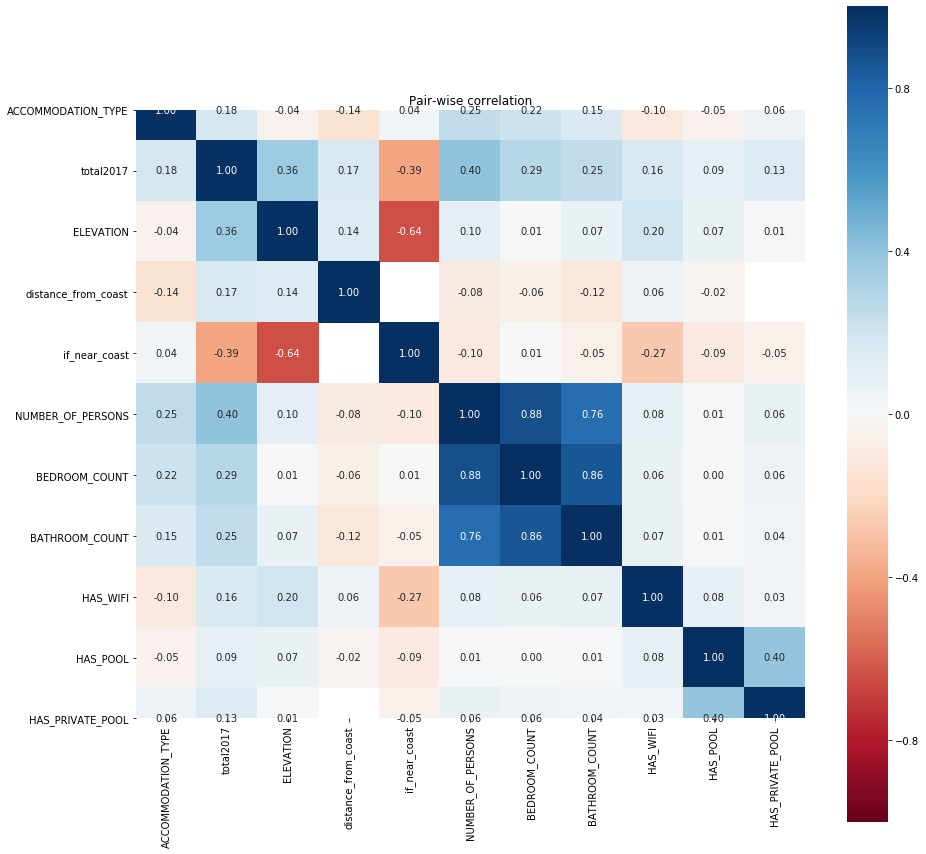

In [89]:
corr_cols = ['ACCOMMODATION_TYPE', 'total2017', 'ELEVATION', 'distance_from_coast', 'if_near_coast', 'NUMBER_OF_PERSONS', 'BEDROOM_COUNT', 'BATHROOM_COUNT', 'HAS_WIFI', 'HAS_POOL', 'HAS_PRIVATE_POOL']
colormap = plt.cm.RdBu
plt.figure(figsize=(15,15))
sns.heatmap(de_accommodations[corr_cols].astype(float).corr(), linewidths=0.0, vmax=1.0, vmin=-1.0, square=True, cmap=colormap, linecolor='black', annot=True,fmt=".2f")
plt.title('Pair-wise correlation')